# PCA (Principal Component Analysis)

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

**PCA** reduces the number of dimensions in large datasets by creating new variables called principal components that capture the maximum variance in the original data. These components are:
- linear combinations of the original variables
- uncorrelated with each other (orthogonal)
- ordered by importance - first component explains most variance, second explains second most, etc.

This of course leads to a trade-off: you gain simplicity and computational efficiency but lose some interpretability, as principal components are mixtures of original variables rather than meaningful concepts.

# How it works?

**1st** step: **Standarization**
1. Calculate **mean** for each feature: $\mu_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij}$
2. Calculate **standard deviation** for each feature: $\sigma_j = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \mu_j)^2 }$
3. **Standardize** each feature: $x'_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}$
4. **Result**: Standardized matrix $\mathbf{X}'$ with $\mu = 0$ and $\sigma = 1$ for all features

**2nd** step: **Covariance Matrix Calculation**
1. Compute **covariance matrix**: $\mathbf{C} = \frac{1}{n - 1} \, \mathbf{X}'^{\mathrm{T}} \mathbf{X}'$
2. **Matrix dimensions**: (n_features × n_features)
3. **Properties**: Symmetric matrix where $\mathbf{C}_{ij}$ shows correlation between features $i$ and $j$

**3rd** step: **Eigendecomposition**
1. Find **eigenvalues and eigenvectors** of covariance matrix $\mathbf{C}$
2. **Solve**: $\mathbf{C} \mathbf{v}_i = \lambda_i \mathbf{v}_i$, where: $\lambda_i$ = eigenvalues (variance explained by each component), $\mathbf{v}_i$ = eigenvectors (direction of principal components)
3. **Normalize eigenvectors** to unit length

**4th** step: **Component Selection**
1. **Sort eigenvalues** in **descending** order: $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_p$
2. **Sort corresponding eigenvectors** in same order
3. Calculate **explained variance ratio**: $\frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}$
4. Choose **number of components k** based on:
a) **Cumulative variance threshold** (e.g., 95%),
b) **Elbow method**,
c) **Domain requirements**

**5th** step: **Transformation**
1. Create **projection matrix $\mathbf{W}$**: (n_features$\times k$) using first $k$ eigenvectors
2. **Transform data**: $\mathbf{Y} = \mathbf{X}' \times \mathbf{W}$
3. **Result**: Reduced data matrix $\mathbf{Y}$ with shape (n_samples, $k$)

**Practical Implementation Algorithm**

Input Parameters:
-   $\mathbf{X}$: Data matrix (n_samples $\times$ n_features)
- **n_components**: Number of components to keep

# Example of use

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

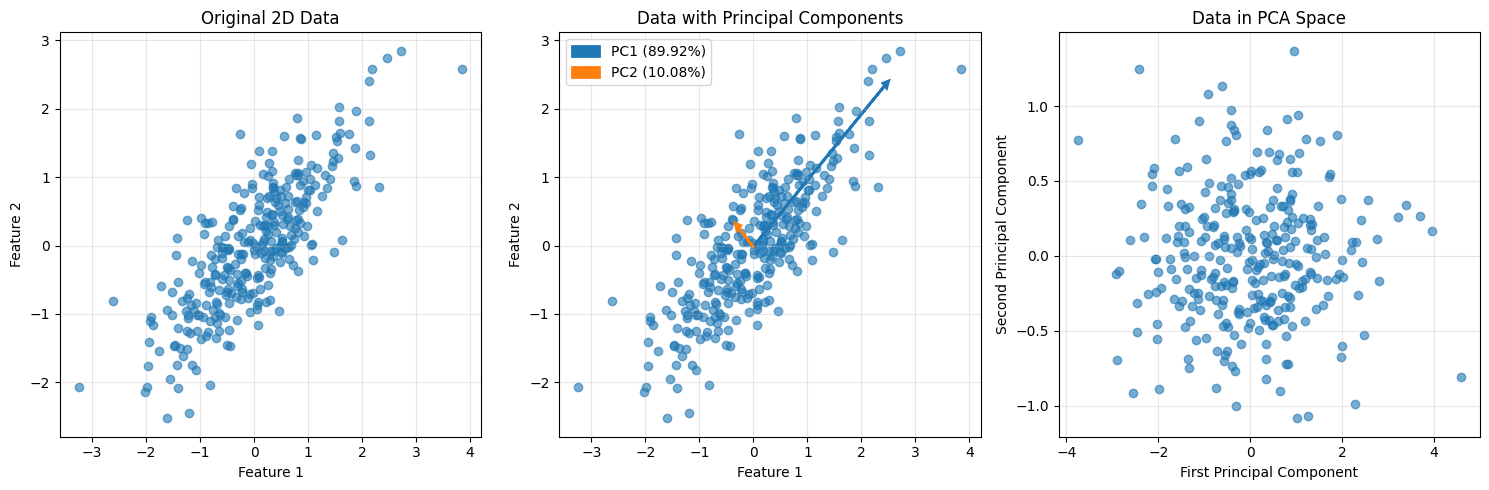

Explained variance ratio: [0.89920703 0.10079297]
Total variance explained: 100.00%


In [2]:
# Mathematical intuition with a simple 2D example
np.random.seed(42)

# Create correlated 2D data
n_samples = 300
x1 = np.random.normal(0, 1, n_samples)
x2 = 0.8 * x1 + 0.6 * np.random.normal(0, 1, n_samples)
data_2d = np.column_stack([x1, x2])

# Visualize original data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original data
axes[0].scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6)
axes[0].set_title('Original 2D Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# Apply PCA
pca_2d = PCA(n_components=2)
data_pca = pca_2d.fit_transform(data_2d)

# Show principal components
mean_point = np.mean(data_2d, axis=0)
axes[1].scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6)

# Plot principal components as arrows
for i, (comp, var) in enumerate(zip(pca_2d.components_, pca_2d.explained_variance_)):
    axes[1].arrow(mean_point[0], mean_point[1], 
                  comp[0] * var * 2, comp[1] * var * 2,
                  head_width=0.1, head_length=0.1, 
                  fc=f'C{i}', ec=f'C{i}', linewidth=2,
                  label=f'PC{i+1} ({pca_2d.explained_variance_ratio_[i]:.2%})')

axes[1].set_title('Data with Principal Components')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Transformed data
axes[2].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6)
axes[2].set_title('Data in PCA Space')
axes[2].set_xlabel('First Principal Component')
axes[2].set_ylabel('Second Principal Component')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_2d.explained_variance_ratio_):.2%}")

This example shows how PCA finds patterns in data using simple 2D points we can actually see. We create 300 data points where one feature depends on the other, making an oval-shaped cloud.

PCA finds the two most important directions in this cloud: the long direction (PC1) where data spreads out most, and the short direction (PC2) perpendicular to it. The arrows show these directions.

**Important**: This keeps both dimensions (2D -> 2D), so it is not reducing complexity - it is just rotating the data to align with these important directions. This helps us understand what PCA does before we use it on bigger datasets where we actually throw away less important dimensions.

**Example with real dataset**

In [3]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("=== Wine Dataset Overview ===")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(target_names)}")
print(f"Class names: {target_names}")
print(f"Features: {len(feature_names)}")
print("\nFirst 5 feature names:")
for i, name in enumerate(feature_names):
    print(f"  {i+1}. {name}")

=== Wine Dataset Overview ===
Dataset shape: (178, 13)
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']
Features: 13

First 5 feature names:
  1. alcohol
  2. malic_acid
  3. ash
  4. alcalinity_of_ash
  5. magnesium
  6. total_phenols
  7. flavanoids
  8. nonflavanoid_phenols
  9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline


=== Dataset Statistics ===
       alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00  178.00             178.00     178.00   
mean     13.00        2.34    2.37              19.49      99.74   
std       0.81        1.12    0.27               3.34      14.28   
min      11.03        0.74    1.36              10.60      70.00   
25%      12.36        1.60    2.21              17.20      88.00   
50%      13.05        1.87    2.36              19.50      98.00   
75%      13.68        3.08    2.56              21.50     107.00   
max      14.83        5.80    3.23              30.00     162.00   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean            2.30        2.03                  0.36             1.59   
std             0.63        1.00                  0.12             0.57   
min             0.98        0.34                  0.13      

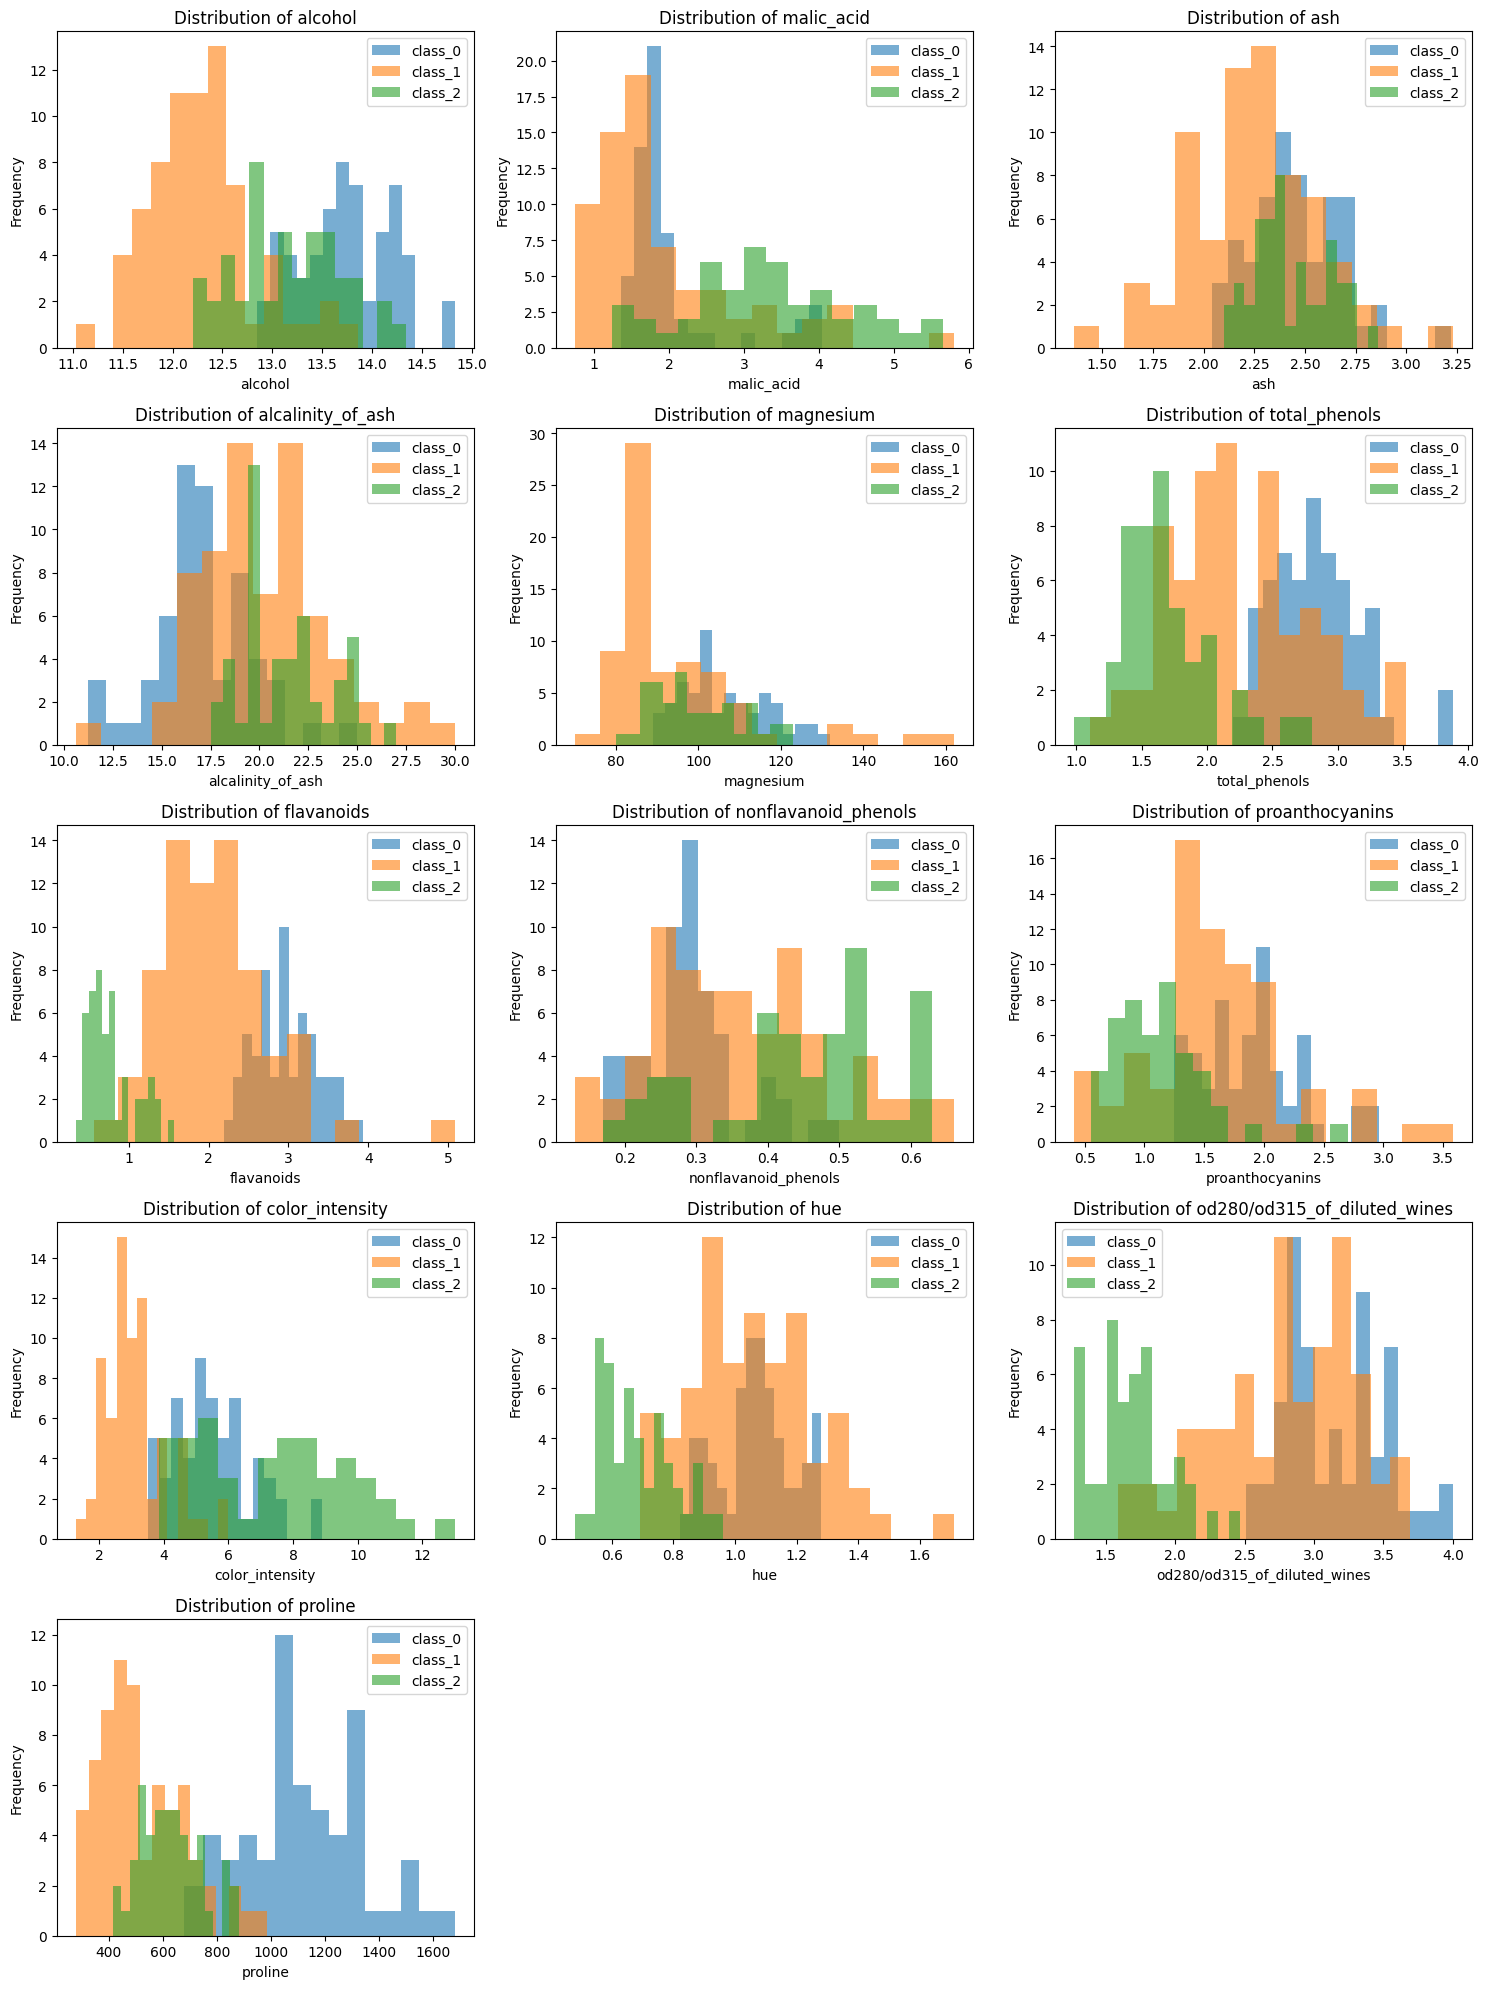

In [4]:
# Create DataFrame for easier handling
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['target'] = y
wine_df['target_names'] = [target_names[i] for i in y]

# Display basic statistics
print("=== Dataset Statistics ===")
print(wine_df.describe().round(2))

# Check for missing values
print(f"\nMissing values: {wine_df.isnull().sum().sum()}")

# Visualize feature distributions for all features
num_features = len(feature_names)
num_cols = 3
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    for j, target_name in enumerate(target_names):
        subset = wine_df[wine_df['target'] == j][feature]
        axes[i].hist(subset, alpha=0.6, label=target_name, bins=15)
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Remove unused axes
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Importance of Standardization**

=== Importance of Standardization ===
Original data ranges:
  alcohol: [11.03, 14.83]
  malic_acid: [0.74, 5.80]
  ash: [1.36, 3.23]
  alcalinity_of_ash: [10.60, 30.00]
  magnesium: [70.00, 162.00]

Scaled data ranges:
  alcohol: [-2.43, 2.26]
  malic_acid: [-1.43, 3.11]
  ash: [-3.68, 3.16]
  alcalinity_of_ash: [-2.67, 3.15]
  magnesium: [-2.09, 4.37]


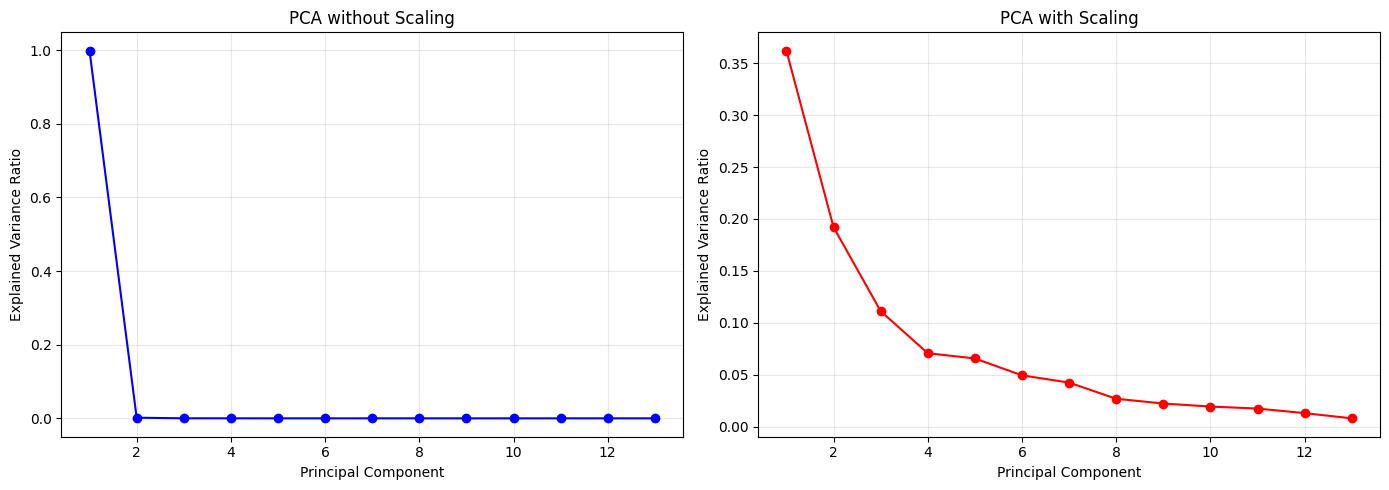

First 3 components cumulative explained variance ratio:
  Without scaling: 99.99%
  With scaling: 66.53%


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("=== Importance of Standardization ===")
print("Original data ranges:")
for i, name in enumerate(feature_names[:5]):
    print(f"  {name}: [{X[:, i].min():.2f}, {X[:, i].max():.2f}]")

print("\nScaled data ranges:")
for i, name in enumerate(feature_names[:5]):
    print(f"  {name}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

# Compare PCA with and without scaling
pca_unscaled = PCA()
pca_unscaled.fit(X)

pca_scaled = PCA()
pca_scaled.fit(X_scaled)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, 14), pca_unscaled.explained_variance_ratio_, 'bo-')
axes[0].set_title('PCA without Scaling')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, 14), pca_scaled.explained_variance_ratio_, 'ro-')
axes[1].set_title('PCA with Scaling')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("First 3 components cumulative explained variance ratio:")
print(f"  Without scaling: {sum(pca_unscaled.explained_variance_ratio_[:3]):.2%}")
print(f"  With scaling: {sum(pca_scaled.explained_variance_ratio_[:3]):.2%}")

**Why is scaling so important?**

**Without** scaling (99.99% cumulative explained variance ratio in 3 components): PCA gets tricked by features with big numbers, creating misleading results where features with large values dominate everything and hide important patterns from smaller-valued features.

**With** scaling (66.53% cumulative explained variance ratio in 3 components): All features get equal treatment in the analysis, creating better principal components that capture real relationships between wine properties instead of just being fooled by which numbers happen to be bigger.

So, getting a lower percentage after scaling is actually a good sign - it means all features are contributing more equally, the data is more balanced, and the results are easier to understand. This can help models perform better.

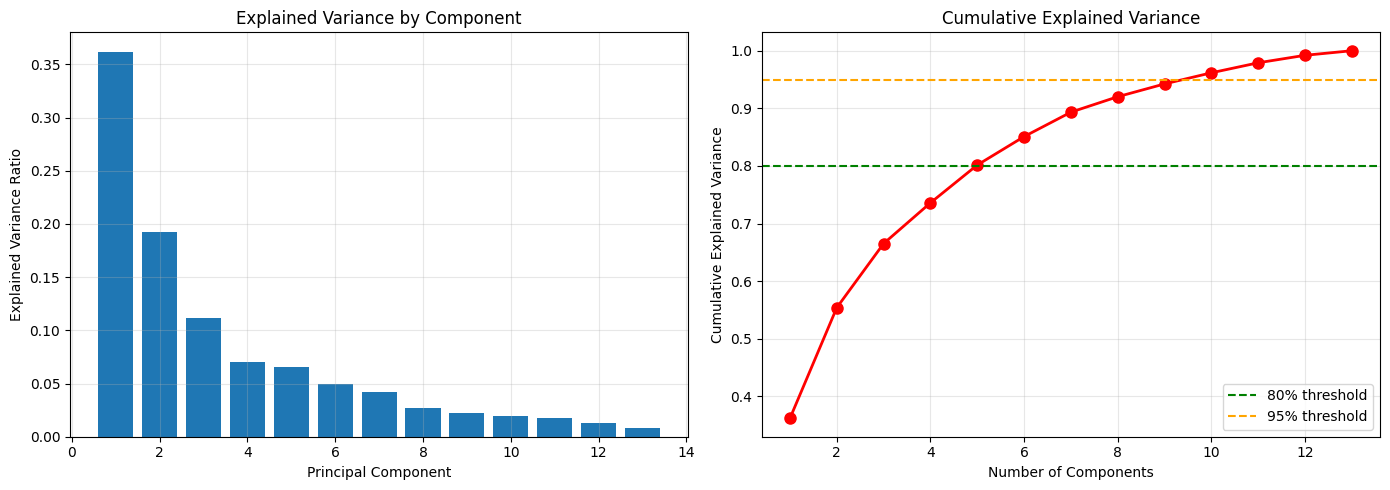

=== Variance Explained by Components ===
PC1: 0.362 (36.2%)
PC2: 0.192 (19.2%)
PC3: 0.111 (11.1%)
PC4: 0.071 (7.1%)
PC5: 0.066 (6.6%)

Components needed for 80% variance: 5
Components needed for 95% variance: 10


In [6]:
# Apply PCA with all components to analyze variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual component variance
axes[0].bar(range(1, 14), pca_full.explained_variance_ratio_)
axes[0].set_title('Explained Variance by Component')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].grid(True, alpha=0.3)

# Cumulative variance
axes[1].plot(range(1, 14), cumulative_variance, 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.8, color='g', linestyle='--', label='80% threshold')
axes[1].axhline(y=0.95, color='orange', linestyle='--', label='95% threshold')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print variance information
print("=== Variance Explained by Components ===")
for i in range(5):
    print(f"PC{i+1}: {pca_full.explained_variance_ratio_[i]:.3f} ({pca_full.explained_variance_ratio_[i]*100:.1f}%)")

print(f"\nComponents needed for 80% variance: {np.argmax(cumulative_variance >= 0.8) + 1}")
print(f"Components needed for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

In [7]:
# Apply PCA with optimal number of components
n_components = np.argmax(cumulative_variance >= 0.95) + 1
pca_optimal = PCA(n_components=n_components)
X_pca = pca_optimal.fit_transform(X_scaled)

print(f"=== PCA Results with {n_components} Components ===")
print(f"Original dimensions: {X.shape}")
print(f"Reduced dimensions: {X_pca.shape}")
print(f"Variance preserved: {sum(pca_optimal.explained_variance_ratio_):.2%}")
print(f"Dimensionality reduction: {(1 - n_components/X.shape[1])*100:.1f}%")

# Create DataFrame with PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
pca_df['target'] = y
pca_df['target_names'] = [target_names[i] for i in y]

print("\nPCA DataFrame:")
print(pca_df.head())

=== PCA Results with 10 Components ===
Original dimensions: (178, 13)
Reduced dimensions: (178, 10)
Variance preserved: 96.17%
Dimensionality reduction: 23.1%

PCA DataFrame:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  target target_names  
0 -0.065139 -0.641443  1.020956       0      class_0  
1 -1.024416  0.308847  0.159701       0      class_0  
2  0.344216  1.177834  0.113361       0      class_0  
3 -0.643593 -0.052544  0.239413       0      class_0  
4 -0.416700 -0.326819 -0.078366       0      class_0  


**Visualization in PCA Space**

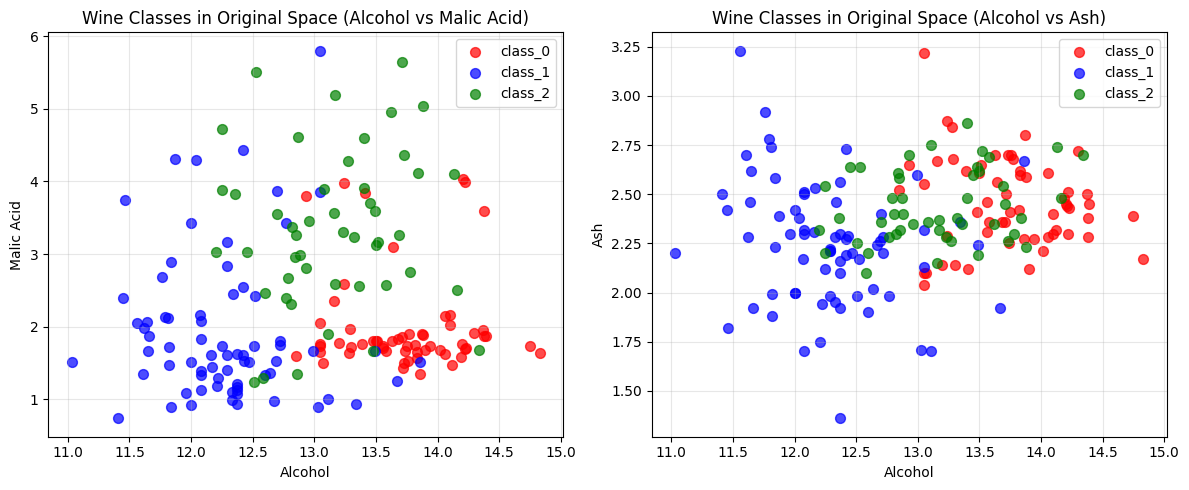

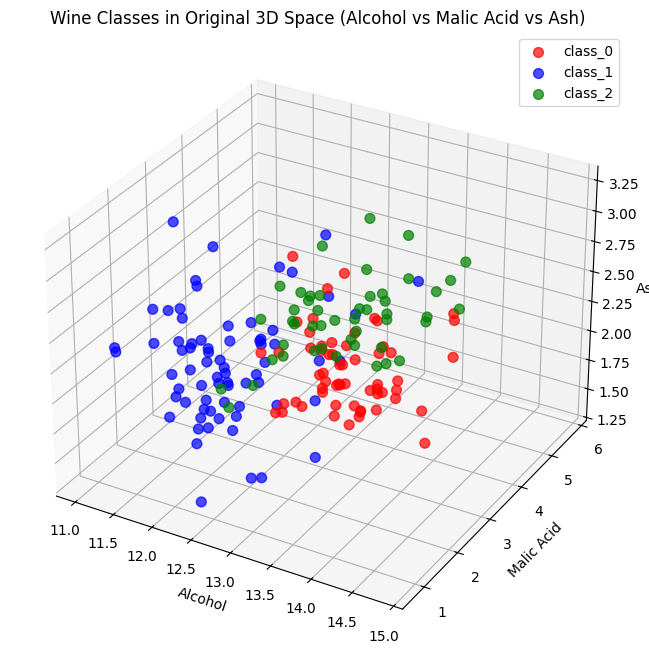

In [8]:
# Pre-PCA visualization using original features
plt.figure(figsize=(12, 5))

# Plot 1: Alcohol vs Malic Acid
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green']
for i, target_name in enumerate(target_names):
    subset = wine_df[wine_df['target'] == i]
    plt.scatter(subset['alcohol'], subset['malic_acid'], 
               c=colors[i], label=target_name, alpha=0.7, s=50)

plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Wine Classes in Original Space (Alcohol vs Malic Acid)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Alcohol vs Ash
plt.subplot(1, 2, 2)
for i, target_name in enumerate(target_names):
    subset = wine_df[wine_df['target'] == i]
    plt.scatter(subset['alcohol'], subset['ash'], 
               c=colors[i], label=target_name, alpha=0.7, s=50)

plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.title('Wine Classes in Original Space (Alcohol vs Ash)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 3 (3D): Alcohol vs Malic Acid vs Ash
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, target_name in enumerate(target_names):
    subset = wine_df[wine_df['target'] == i]
    ax.scatter(subset['alcohol'], subset['malic_acid'], subset['ash'],
              c=colors[i], label=target_name, alpha=0.7, s=50)

ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Ash')
ax.set_title('Wine Classes in Original 3D Space (Alcohol vs Malic Acid vs Ash)')
ax.legend()

plt.show()

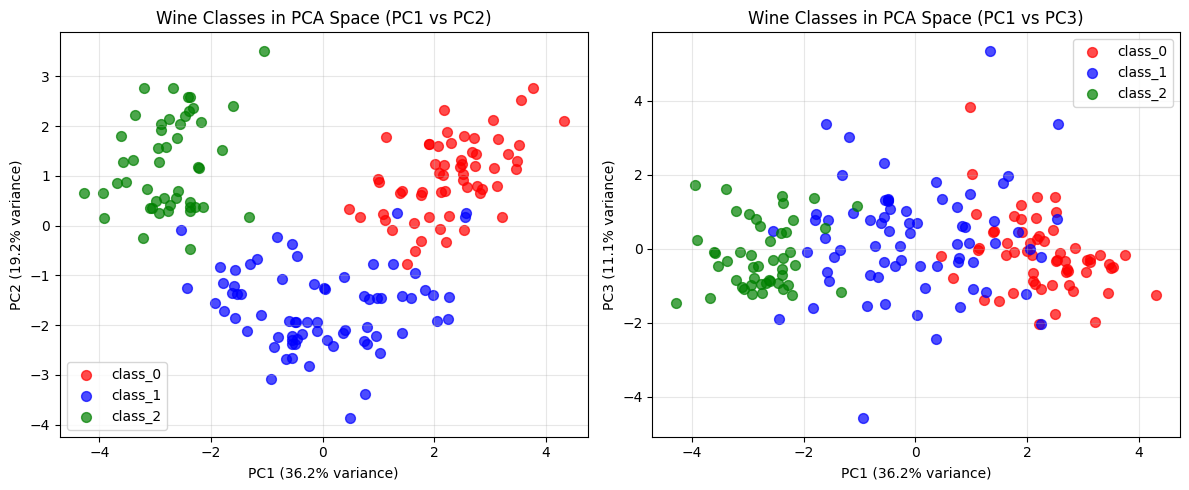

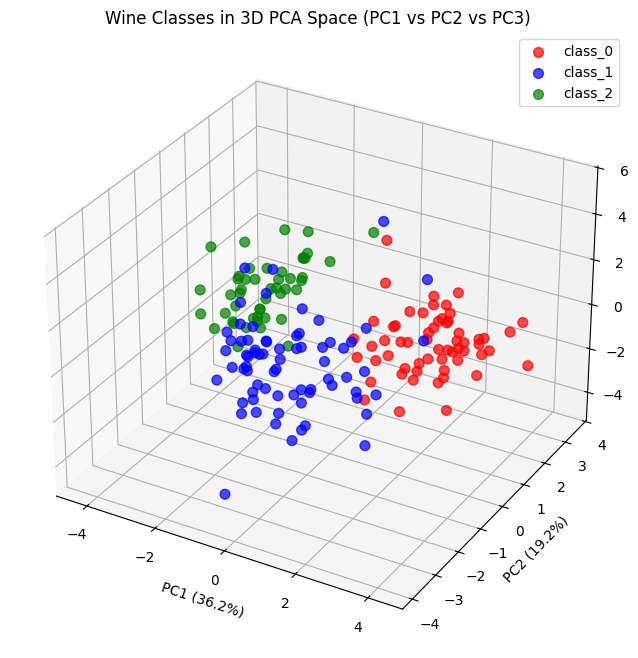

In [9]:
# Post-PCA visualization
plt.figure(figsize=(12, 5))

# Plot 1: PC1 vs PC2
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green']
for i, target_name in enumerate(target_names):
    subset = pca_df[pca_df['target'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], 
               c=colors[i], label=target_name, alpha=0.7, s=50)

plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Wine Classes in PCA Space (PC1 vs PC2)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: PC1 vs PC3
plt.subplot(1, 2, 2)
for i, target_name in enumerate(target_names):
    subset = pca_df[pca_df['target'] == i]
    plt.scatter(subset['PC1'], subset['PC3'], 
               c=colors[i], label=target_name, alpha=0.7, s=50)

plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC3 ({pca_optimal.explained_variance_ratio_[2]:.1%} variance)')
plt.title('Wine Classes in PCA Space (PC1 vs PC3)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 3 (3D): PC1 vs PC2 vs PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, target_name in enumerate(target_names):
    subset = pca_df[pca_df['target'] == i]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
              c=colors[i], label=target_name, alpha=0.7, s=50)

ax.set_xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca_optimal.explained_variance_ratio_[2]:.1%})')
ax.set_title('Wine Classes in 3D PCA Space (PC1 vs PC2 vs PC3)')
ax.legend()

plt.show()

These plots demonstrate PCA's power to reveal hidden structure in complex data. By reducing the dimensions, we can clearly see that different classes naturally cluster in separate regions of the PCA space. This cleaner separation shows that PCA successfully identified the most important directions that distinguish between wine types, making patterns that were invisible in the original high-dimensional space now visually obvious.

**What do the principal components represent?**

=== What do the principal components represent? ===
Top 5 features for first 4 components:

PC1 (explains 36.2% of variance):
  + flavanoids: 0.423
  + total_phenols: 0.395
  + od280/od315_of_diluted_wines: 0.376
  + proanthocyanins: 0.313
  - nonflavanoid_phenols: 0.299

PC2 (explains 19.2% of variance):
  + color_intensity: 0.530
  + alcohol: 0.484
  + proline: 0.365
  + ash: 0.316
  + magnesium: 0.300

PC3 (explains 11.1% of variance):
  + ash: 0.626
  + alcalinity_of_ash: 0.612
  - alcohol: 0.207
  + nonflavanoid_phenols: 0.170
  + od280/od315_of_diluted_wines: 0.166

PC4 (explains 7.1% of variance):
  + malic_acid: 0.537
  - hue: 0.428
  + proanthocyanins: 0.399
  - magnesium: 0.352
  - proline: 0.232



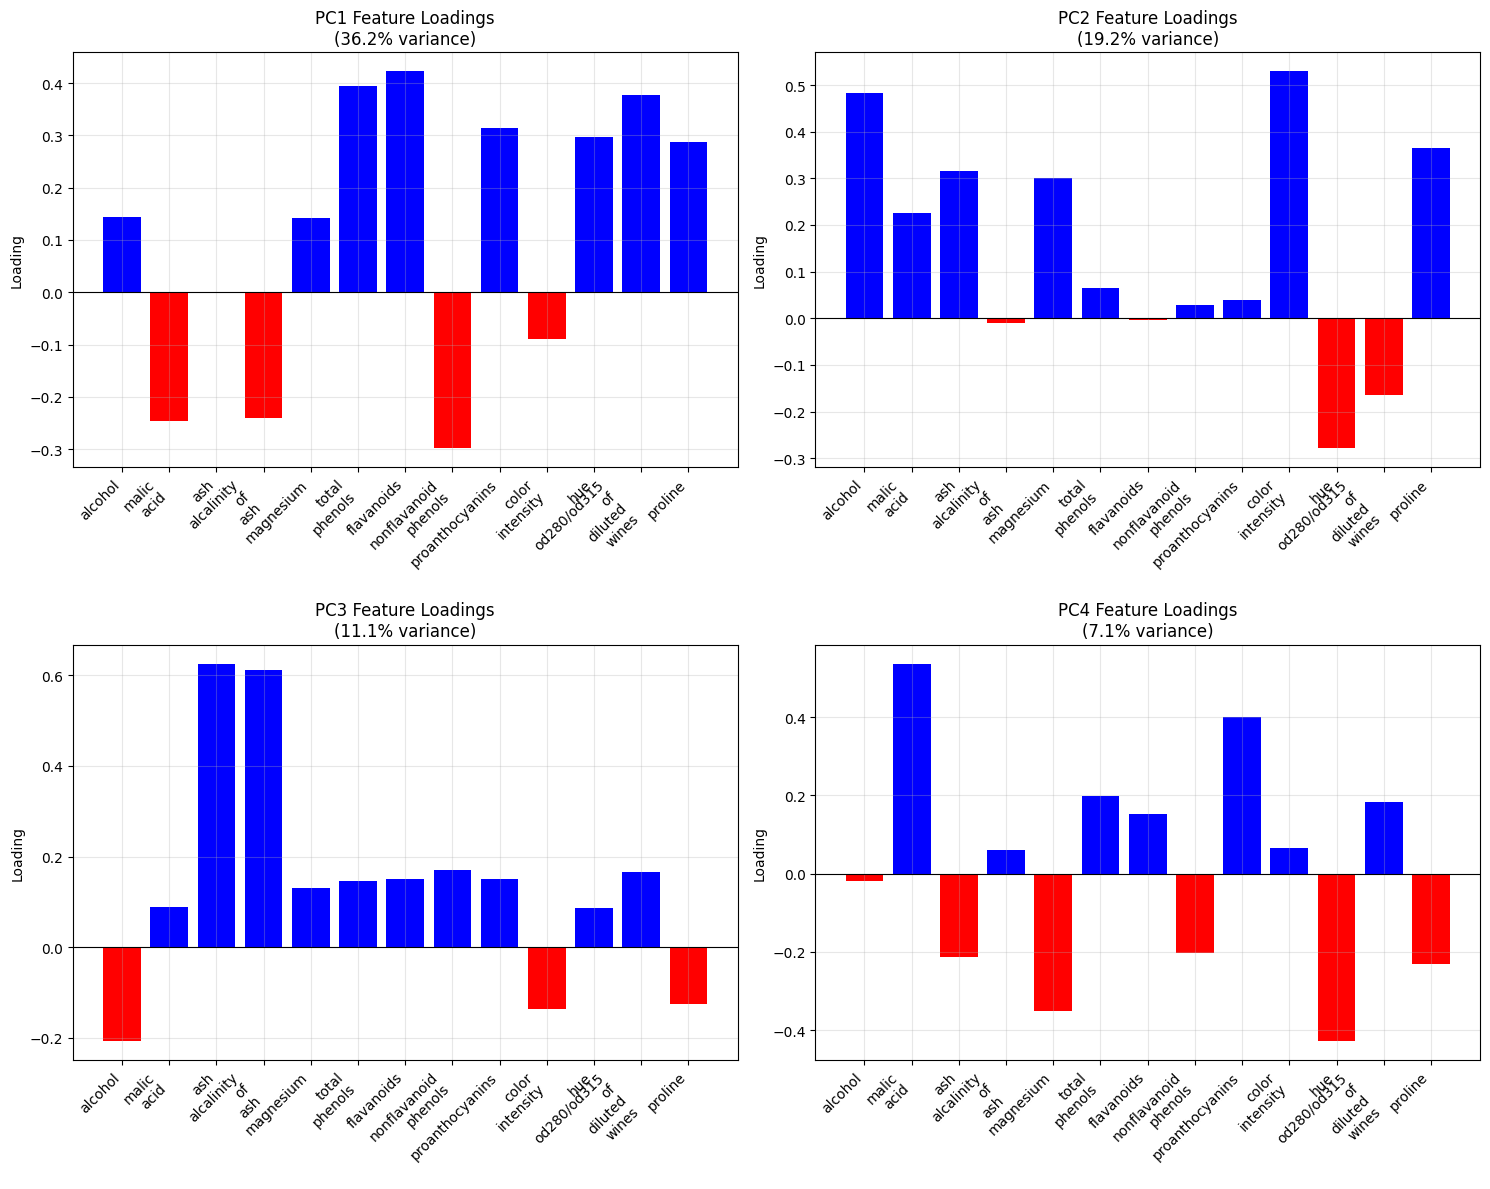

In [10]:
# Analyze what each component represents
components_df = pd.DataFrame(
    pca_optimal.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=feature_names
)

print("=== What do the principal components represent? ===")
print("Top 5 features for first 4 components:\n")

for i in range(min(4, n_components)):  # Show first 4 components
    print(f"PC{i+1} (explains {pca_optimal.explained_variance_ratio_[i]:.1%} of variance):")
    
    # Get absolute loadings to find most important features
    abs_loadings = abs(components_df[f'PC{i+1}'])
    top_features = abs_loadings.nlargest(5)
    
    for feature, loading in top_features.items():
        original_loading = components_df.loc[feature, f'PC{i+1}']
        sign = "+" if original_loading > 0 else "-"
        print(f"  {sign} {feature}: {abs(original_loading):.3f}")
    print()

# Visualize component loadings
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i in range(min(4, n_components)):
    loadings = components_df[f'PC{i+1}'].values
    feature_names_short = [name.replace('_', '\n') for name in feature_names]
    
    bars = axes[i].bar(range(len(feature_names)), loadings, 
                       color=['red' if x < 0 else 'blue' for x in loadings])
    axes[i].set_title(f'PC{i+1} Feature Loadings\n({pca_optimal.explained_variance_ratio_[i]:.1%} variance)')
    axes[i].set_xticks(range(len(feature_names)))
    axes[i].set_xticklabels(feature_names_short, rotation=45, ha='right')
    axes[i].set_ylabel('Loading')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()